## Knn is a non parametric algo that uses the target info from the k nearest neighbours of an observation and regress/classify based on them. We use built in library algo here.

## Knn classifier

In [33]:
import pandas as pd
import numpy as np
import os
import sklearn
#for test_train split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [34]:
iris = pd.read_csv('iris.csv')

In [35]:
#initialize model
knn = KNeighborsClassifier(n_neighbors=3)

In [36]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', "petal_width"]]
y = iris['species']

In [37]:
type(y)

pandas.core.series.Series

In [38]:
# split into train and test using stratification on y
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, stratify=y, random_state=100)  

In [39]:
# fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
# make prediction
y_pred = knn.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9555555555555556

## Do cross validation to get best k

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
neighbors = list(range(1,50))

cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = "accuracy")
    cv_scores.append(scores.mean())

In [44]:
cv_scores

[0.9700000000000001,
 0.9318181818181819,
 0.9518181818181819,
 0.941818181818182,
 0.9518181818181819,
 0.9618181818181819,
 0.9518181818181819,
 0.9618181818181819,
 0.9709090909090909,
 0.9618181818181819,
 0.9527272727272728,
 0.9427272727272727,
 0.9527272727272728,
 0.9527272727272728,
 0.9527272727272728,
 0.9618181818181819,
 0.9527272727272728,
 0.9527272727272728,
 0.9527272727272728,
 0.9618181818181819,
 0.9527272727272728,
 0.9527272727272728,
 0.9527272727272728,
 0.9527272727272728,
 0.9527272727272728,
 0.9527272727272728,
 0.9527272727272728,
 0.9718181818181819,
 0.9627272727272727,
 0.9527272727272728,
 0.9527272727272728,
 0.9327272727272728,
 0.9527272727272728,
 0.9327272727272728,
 0.9327272727272728,
 0.9136363636363637,
 0.9136363636363637,
 0.9136363636363637,
 0.9227272727272728,
 0.9136363636363637,
 0.9327272727272728,
 0.9227272727272728,
 0.9227272727272728,
 0.9227272727272728,
 0.9418181818181818,
 0.9227272727272728,
 0.9327272727272728,
 0.90454545454

In [45]:
import matplotlib.pyplot as plt


In [46]:
error = [1 - x for x in cv_scores]
error

[0.029999999999999916,
 0.06818181818181812,
 0.048181818181818103,
 0.058181818181818,
 0.048181818181818103,
 0.038181818181818095,
 0.048181818181818103,
 0.038181818181818095,
 0.029090909090909056,
 0.038181818181818095,
 0.047272727272727244,
 0.05727272727272725,
 0.047272727272727244,
 0.047272727272727244,
 0.047272727272727244,
 0.038181818181818095,
 0.047272727272727244,
 0.047272727272727244,
 0.047272727272727244,
 0.038181818181818095,
 0.047272727272727244,
 0.047272727272727244,
 0.047272727272727244,
 0.047272727272727244,
 0.047272727272727244,
 0.047272727272727244,
 0.047272727272727244,
 0.028181818181818086,
 0.037272727272727346,
 0.047272727272727244,
 0.047272727272727244,
 0.06727272727272715,
 0.047272727272727244,
 0.06727272727272715,
 0.06727272727272715,
 0.08636363636363631,
 0.08636363636363631,
 0.08636363636363631,
 0.07727272727272716,
 0.08636363636363631,
 0.06727272727272715,
 0.07727272727272716,
 0.07727272727272716,
 0.07727272727272716,
 0.05

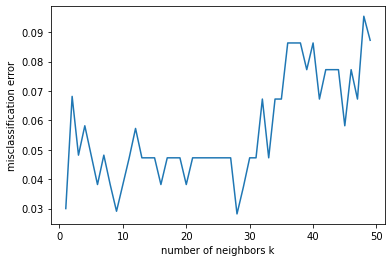

In [47]:
# plot errors vs values of k
plt.plot(neighbors, error)
plt.xlabel("number of neighbors k")
plt.ylabel("misclassification error")
plt.show()

### From this we can say that k = 9 is a good value

## For KNN Regression  -  use knnregressor
dont use confusion matrix instead use rmse
rest remains same as above

In [49]:
from sklearn.neighbors import KNeighborsRegressor

In [50]:
# init model
knnr = KNeighborsRegressor(n_neighbors=3)

In [51]:
cars = pd.read_csv("cars.csv")
cars.sample(10)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
15,Dodge Challenger SE,15.0,8,383.0,170,3563,10.0,70,US
244,Chevrolet Chevette,30.5,4,98.0,63,2051,17.0,77,US
78,Mazda RX2 Coupe,19.0,3,70.0,97,2330,13.5,72,Japan
121,Fiat 124 Sport Coupe,26.0,4,98.0,90,2265,15.5,73,Europe
22,AMC Hornet,18.0,6,199.0,97,2774,15.5,70,US
326,Mazda 626,31.3,4,120.0,75,2542,17.5,80,Japan
333,Volkswagen Dasher (diesel),43.4,4,90.0,48,2335,23.7,80,Europe
159,Plymouth Valiant Custom,19.0,6,225.0,95,3264,16.0,75,US
346,Buick Skylark,26.6,4,151.0,84,2635,16.4,81,US
57,Opel 1900,28.0,4,116.0,90,2123,14.0,71,Europe


In [52]:
X = cars[["Cylinders","Weight","Horsepower"]]
y = cars["MPG"]

In [53]:
# split data into train and test
(X_train,X_test,y_train,y_test) = train_test_split(X, y, test_size=0.3, random_state = 100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(284, 3)
(122, 3)
(284,)
(122,)


In [54]:
# fit the model
knnr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [55]:
# make prediction
y_pred = knnr.predict(X_test)
y_pred

array([20.76666667, 30.6       , 22.66666667, 26.93333333, 20.76666667,
       27.2       , 17.53333333, 23.        , 17.83333333, 25.86666667,
       33.26666667, 13.33333333, 14.        , 32.86666667, 27.13333333,
       27.3       , 27.83333333, 22.4       , 26.66666667, 28.46666667,
       25.33333333, 27.23333333, 25.        , 25.        , 17.53333333,
       14.3       , 25.2       , 17.83333333, 26.63333333, 29.33333333,
       21.        , 19.5       , 24.6       , 28.        , 19.06666667,
       29.96666667, 17.        , 27.5       , 20.33333333, 13.83333333,
       13.66666667, 29.        , 19.06666667, 21.86666667, 31.46666667,
       26.2       , 15.9       , 33.16666667, 28.        , 17.66666667,
       31.66666667, 29.        , 17.83333333, 13.5       , 11.06666667,
       20.36666667, 14.        , 33.13333333, 19.53333333, 13.66666667,
       24.56666667, 13.        , 37.8       , 20.76666667, 18.2       ,
       24.66666667, 27.        , 35.03333333, 36.06666667, 31.1 

## cross validation to get best k

In [56]:
neighbors = list(range(1,50))

cv_scores = []

for k in neighbors:
    knnr = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knnr, X_train, y_train, cv=10, scoring = "neg_root_mean_squared_error")
    cv_scores.append(scores.mean())

In [57]:
cv_scores

[-6.843539162028996,
 -6.227884244014893,
 -5.765242919916625,
 -5.574555107636291,
 -5.4627957521569455,
 -5.434125673312414,
 -5.4076933257159,
 -5.41231461025828,
 -5.416747839967973,
 -5.43798514907443,
 -5.441273751572586,
 -5.488680870585981,
 -5.454468780926146,
 -5.449779133461657,
 -5.446668037347276,
 -5.430752788142063,
 -5.416631108065084,
 -5.387077885079887,
 -5.3847887784344834,
 -5.375506151763288,
 -5.3601789279084215,
 -5.3710628200100405,
 -5.352581123959317,
 -5.374810408032295,
 -5.3649458849804486,
 -5.3510207477069445,
 -5.347269583204006,
 -5.334678326075652,
 -5.3282948026745185,
 -5.3328453911597755,
 -5.338016480551879,
 -5.342935754471123,
 -5.341629040666241,
 -5.342142517628456,
 -5.321681658889297,
 -5.321120039082001,
 -5.311954014321053,
 -5.294748041347367,
 -5.303377755220615,
 -5.300060249913622,
 -5.299848475758796,
 -5.295777778199466,
 -5.285069476591085,
 -5.285132615426445,
 -5.281265142981992,
 -5.281176339675214,
 -5.285961693186889,
 -5.29304

In [58]:
sorted(sklearn.metrics.SCORERS.keys()) 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

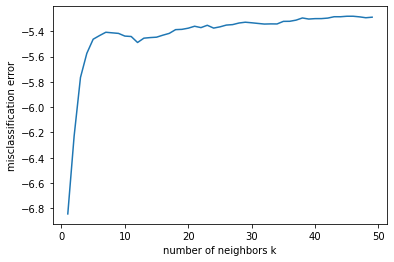

In [59]:
# plot error vs k values
plt.plot(neighbors, cv_scores)
plt.xlabel("number of neighbors k")
plt.ylabel("misclassification error")
plt.show()

### From this we can see that k=8 is good number